# House Price Prediction

### Importing required libraries
We will be using 'scikit-learn' library to create the linear regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures

### Loading housing data as a dataframe using pandas
The dataset has been taken from 'kaggle.com'.

In [2]:
df=pd.DataFrame(pd.read_csv("Housing.csv"))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Doing one-hot encoding for the 'furnishingstatus' column.

In [3]:
one_hot_encoded = pd.get_dummies(df['furnishingstatus'])
one_hot_encoded.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [4]:
one_hot_encoded = pd.get_dummies(df['furnishingstatus'], drop_first = True)
# Add the results to the original housing dataframe

df = pd.concat([df, one_hot_encoded], axis = 1)

# Drop 'furnishingstatus' as we have created the dummies for it

df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,False,False


Converting 'yes' or True : 1 and 'no' or False : 0 

In [5]:
# Define a mapping function to convert 'yes' to 1 and 'no' to 0
def map_yes_no_to_binary(value):
    return 1 if value in ['yes', True] else 0

# Apply the mapping function to all specified columns using applymap()
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','semi-furnished','unfurnished']
df[columns_to_convert] = df[columns_to_convert].applymap(map_yes_no_to_binary)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [6]:
# Separate the 'price' column as the target variable (y)
y = df['price']

# Remove the 'price' column to get the features (X)
x= df.drop('price', axis=1)

### Visualizing data

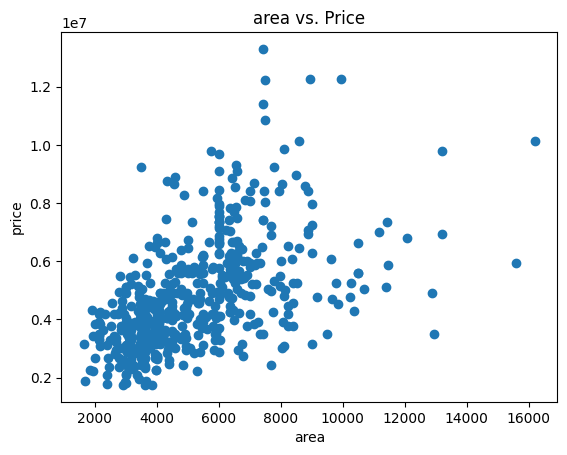

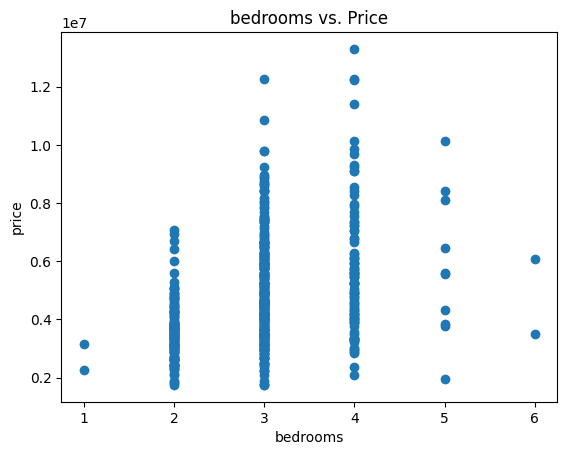

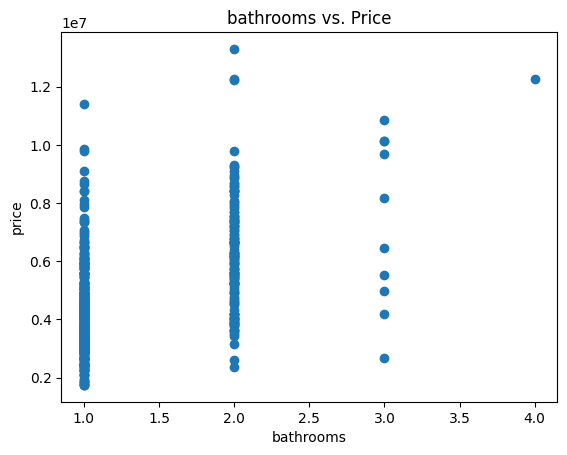

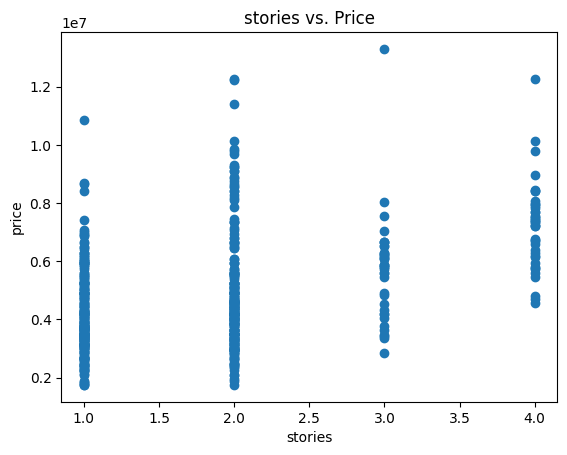

In [7]:
# Plot numerical features against 'price' using scatter plots
x_features = ['area', 'bedrooms', 'bathrooms', 'stories']
for feature in x_features:
    plt.scatter(x[feature], y)
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(f'{feature} vs. Price')
    plt.show()

Split the data into training, validation, and test sets.

In [8]:
X_train, X_rem, y_train, y_rem = train_test_split(x, y, train_size=0.6, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, train_size=0.5, random_state=1)


In [9]:
# looking at the shapes
X_train.shape,y_train.shape

((327, 13), (327,))

### Scale/normalize the training data

In [10]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [11]:
# before normalization
X_train[0:1]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
171,10269,3,1,1,1,0,0,0,0,1,1,1,0


In [12]:
# after normalization
X_norm[0:1]

array([[ 2.21760033,  0.        , -0.56915796, -0.9462113 ,  0.40970373,
        -0.46434188, -0.74146007, -0.20347303, -0.63516413,  0.36748887,
         1.78670302,  1.16297807, -0.70710678]])

### Create and fit the regression model

In [13]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 41, number of weight updates: 13408.0


### Viewing parameters

In [14]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\nw: {w_norm}\nb:{b_norm}")

model parameters:
w: [ 552858.36936031   30497.0242607   474490.34906477  461945.64945077
  178767.0707884    96515.41822425  287113.23460581  192324.22844131
  281110.64468557  211138.72563833  277547.69208221  -58242.7045021
 -197642.94766175]
b:[4720550.15062771]


### Make predictions

In [15]:
y_pred = np.around(sgdr.predict(X_norm),decimals=3)
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{np.array(y_train[:4])}")

Prediction on training set:
[5482775.209 6192727.269 7868714.89  3176535.985]
Target values 
[5250000 5460000 6790000 3500000]


### Plot results
(plotting predicted values versus target values)

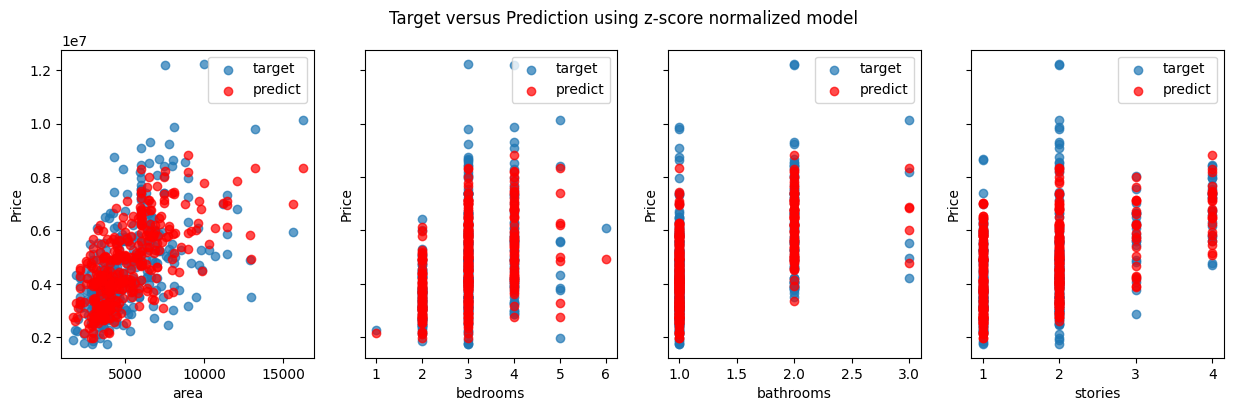

In [16]:
# plot predictions and targets vs original features    
fig, ax = plt.subplots(1, len(x_features), figsize=(15, 4), sharey=True)
for i, feature in enumerate(x_features):
    ax[i].scatter(X_train[feature], y_train, label='target', alpha=0.7)
    ax[i].scatter(X_train[feature], y_pred, color='r', label='predict', alpha=0.7)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel("Price")
    ax[i].legend()

fig.suptitle("Target versus Prediction using z-score normalized model")
plt.show()

### Calculate error

In [17]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred)
mse

1006074513978.7314

In [18]:
from sklearn.metrics import r2_score 
r2_score(y_train, y_pred)

0.6838856023068759

## R2_score of 0.6839 means our model is able to capture 68.39% of the dataset's variance.

As we can see MSE(mean squared error) is very pretty high, let's try to reduce it...

### Applying Ridge Regularization(L2)

In [19]:
# Create a Ridge regression model with a regularization strength (alpha)
ridge_model = Ridge(alpha=1)

# Fit the Ridge model to the training data
ridge_model.fit(X_norm, y_train)

# Get the coefficients of the model
coefficients = ridge_model.coef_
coefficients

array([ 550195.14103293,   31558.90840613,  474177.10202601,
        461803.78864596,  178346.0081957 ,   94471.99522224,
        280408.9159059 ,  190459.4828181 ,  284099.88867942,
        208867.98210641,  281574.44047682,  -58586.37348903,
       -195930.89978502])

Only columns with non-zero coefficents are usefull and we can remove the remaining columns from our training data.

In [20]:
columns_indices_to_remove = coefficients < 0

# Get the column indices to keep (opposite of columns_indices_to_remove)
columns_indices_to_keep = ~columns_indices_to_remove

# Filter the columns from the NumPy array 
X_norm_filtered = X_norm[:, columns_indices_to_keep]
X_norm_filtered[:1]

array([[ 2.21760033,  0.        , -0.56915796, -0.9462113 ,  0.40970373,
        -0.46434188, -0.74146007, -0.20347303, -0.63516413,  0.36748887,
         1.78670302]])

### Making new model after removing columns...

In [21]:
sgdr_L2 = SGDRegressor(max_iter=1000)
sgdr_L2.fit(X_norm_filtered, y_train)
print(sgdr_L2)
print(f"number of iterations completed: {sgdr_L2.n_iter_}, number of weight updates: {sgdr_L2.t_}")

SGDRegressor()
number of iterations completed: 35, number of weight updates: 11446.0


### Calculating prediction again...

In [22]:
y_pred_filtered = np.around(sgdr_L2.predict(X_norm_filtered),decimals=3)
print(f"Prediction on training set:\n{y_pred_filtered[:4]}" )
print(f"Target values \n{np.array(y_train[:4])}")

Prediction on training set:
[5447887.788 6154035.168 7776297.652 3361823.193]
Target values 
[5250000 5460000 6790000 3500000]


### Calculating error again...

In [23]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred_filtered)
mse

1031437931279.2955

In [24]:
from sklearn.metrics import r2_score 
r2_score(y_train, y_pred_filtered)

0.6759162707394761

As we can say adding L2 regularization didn't help.

### Let's start again from the beginning but this time also doing feature engineering!
(this time we are keeping only 7 most important columns)

In [25]:
# dropping useless columns from our X_train, X_val, X_test
columns_indices_to_remove = coefficients < 200000
# Get the column names to keep based on 'columns_indices_to_remove'
columns_to_keep = X_train.columns[~columns_indices_to_remove]

# Drop the columns using the column names
X_train_dropped = X_train[columns_to_keep]
X_val_dropped=X_val[columns_to_keep]
# fixing index to start from '0'
X_train_dropped.reset_index(drop=True, inplace=True)
X_train_dropped.head()

,area,bathrooms,stories,basement,airconditioning,parking,prefarea
0,10269,1,1,0,0,1,1
1,6100,1,3,0,1,0,1
2,12090,2,2,0,0,2,1
3,5880,1,1,0,0,0,0
4,6750,1,1,1,0,2,1


In [26]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train_dropped)
# Convert the scaled NumPy array back to a DataFrame
X_norm = pd.DataFrame(X_norm, columns=X_train_dropped.columns)
X_norm.head()

,area,bathrooms,stories,basement,airconditioning,parking,prefarea
0,2.217600,-0.569158,-0.946211,-0.74146,-0.635164,0.367489,1.786703
1,0.381430,-0.569158,1.424755,-0.74146,1.574396,-0.787981,1.786703
2,3.019631,1.522018,0.239272,-0.74146,-0.635164,1.522959,1.786703
3,0.284534,-0.569158,-0.946211,-0.74146,-0.635164,-0.787981,-0.559690
4,0.667712,-0.569158,-0.946211,1.34869,-0.635164,1.522959,1.786703


### Making new model...

In [27]:
sgdr_new = SGDRegressor(max_iter=1000)
sgdr_new.fit(X_norm, y_train)
print(sgdr_new)
print(f"number of iterations completed: {sgdr_new.n_iter_}, number of weight updates: {sgdr_new.t_}")

SGDRegressor()
number of iterations completed: 20, number of weight updates: 6541.0


### Predicting...

In [28]:
y_pred_new = np.around(sgdr_new.predict(X_norm),decimals=3)
print(f"Prediction on training set:\n{y_pred_new[:4]}" )
print(f"Target values \n{np.array(y_train[:4])}")

Prediction on training set:
[5498543.017 5889284.891 7973029.234 3305976.996]
Target values 
[5250000 5460000 6790000 3500000]


In [29]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred_new)
mse

1104921759028.482

In [30]:
from sklearn.metrics import r2_score 
r2_score(y_train, y_pred_new)

0.652827229494157

## Final result

As seen above neither adding regularization neither feature engineering helped.

Our original model was better than the 2 we made adding regularization term and removing less usefull feaures.

Best R2_score = 0.6839